In [1]:
from mcd_clip.combined_optimization.combined_optimizer import CombinedOptimizer, TextEmbeddingTarget, ImageEmbeddingTarget
from decode_mcd import DesignTargets, ContinuousTarget
from mcd_clip.resource_utils import resource_path

/home/yazan/Repositories/Personal/mcd-clip/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dropping clips material columns ['MATERIAL OHCLASS: ALUMINIUM', 'MATERIAL OHCLASS: BAMBOO', 'MATERIAL OHCLASS: CARBON', 'MATERIAL OHCLASS: OTHER', 'MATERIAL OHCLASS: STEEL', 'MATERIAL OHCLASS: TITANIUM']


In [2]:
design_targets = DesignTargets(continuous_targets=[ContinuousTarget('Model Mass', lower_bound=0, upper_bound=2),
                                                   ContinuousTarget('Sim 1 Safety Factor (Inverted)',
                                                                    lower_bound=0, upper_bound=1), ])
target_embeddings = [
    TextEmbeddingTarget(text_target='A futuristic black cyberpunk-style road racing bicycle'),
    ImageEmbeddingTarget(image_path=resource_path('mtb.png')),
]



In [3]:
optimizer = CombinedOptimizer(
    design_targets=design_targets,
    target_embeddings=target_embeddings
)


In [4]:
generator = optimizer.build_generator()

Found framed material columns ['Material=Steel', 'Material=Aluminum', 'Material=Titanium']
Mapping Material=Steel to MATERIAL OHCLASS: STEEL
Mapping Material=Aluminum to MATERIAL OHCLASS: ALUMINUM
Mapping Material=Titanium to MATERIAL OHCLASS: TITANIUM
Dropping clips material columns ['MATERIAL OHCLASS: ALUMINIUM', 'MATERIAL OHCLASS: BAMBOO', 'MATERIAL OHCLASS: CARBON', 'MATERIAL OHCLASS: OTHER', 'MATERIAL OHCLASS: STEEL', 'MATERIAL OHCLASS: TITANIUM']
[17:26:10] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[17:26:11] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[17:26:11] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
Found framed material columns ['Material=Steel', 'Material=Aluminum', 'Material=Titanium']
Mapping Material=Steel to MATERIAL OHCLASS: STEEL
Mapping Material=Aluminum to MATERIAL OHCLASS: ALUMINUM
Mapping Material=Titanium to MATERIAL OHCLASS: TITANIUM
Mapped Material=S

In [5]:
generator.generate(600)

[17:26:20] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[17:26:21] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[17:26:21] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
Found framed material columns ['Material=Steel', 'Material=Aluminum', 'Material=Titanium']
Mapping Material=Steel to MATERIAL OHCLASS: STEEL
Mapping Material=Aluminum to MATERIAL OHCLASS: ALUMINUM
Mapping Material=Titanium to MATERIAL OHCLASS: TITANIUM
Validation successful percent invalid [0.0%]
Validation successful percent invalid [0.0%]
Validation successful percent invalid [0.0%]
Validation successful percent invalid [0.0%]
Validation successful percent invalid [0.0%]
Validation successful percent invalid [0.0%]
Validation function failed 'CS textfield'...
[17:26:22] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[17:26:22] WARNING: ../src/learner.cc:339: No visible GPU is found, 

In [6]:
# generator.generate(700)
import nest_asyncio
nest_asyncio.apply()
from mcd_clip.e2e_runner import IMAGE_CONVERTOR

In [41]:
import numpy as np
samples = generator.sample_with_weights(num_samples=4, avg_gower_weight=1, cfc_weight=1, 
                                        gower_weight=1, diversity_weight=0.05, 
                                        bonus_objectives_weights=np.array([[1, 1, 1, 25]]))
from mcd_clip.bike_rendering.parametric_to_image_convertor import RenderingResult
from mcd_clip.combined_optimization.combined_datasets import CombinedDataset
import pandas as pd
def to_images(samples: pd.DataFrame):
    results = []
    for idx in samples.index:
        results.append(IMAGE_CONVERTOR.to_image(target_bike=CombinedDataset(samples).get_as_clips().loc[idx]))
    return results
images = to_images(samples)

Scoring all counterfactual candidates!
                        We recommend keeping diversity above 0.1 or setting diversity to 0
Calculating diversity matrix!
Sampling diverse set of counterfactual candidates!
samples_index=[809, 968, 893, 885]
Done! Returning CFs
Found framed material columns ['Material=Steel', 'Material=Aluminum', 'Material=Titanium']
Mapping Material=Steel to MATERIAL OHCLASS: STEEL
Mapping Material=Aluminum to MATERIAL OHCLASS: ALUMINUM
Mapping Material=Titanium to MATERIAL OHCLASS: TITANIUM
Deleting key MATERIAL OHCLASS: ALUMINIUM
Deleting key MATERIAL OHCLASS: BAMBOO
Deleting key MATERIAL OHCLASS: CARBON
Deleting key MATERIAL OHCLASS: OTHER
Deleting key MATERIAL OHCLASS: STEEL
Deleting key MATERIAL OHCLASS: TITANIUM
Deleting key Dropout spacing style OHCLASS: 0
Deleting key Dropout spacing style OHCLASS: 1
Deleting key Dropout spacing style OHCLASS: 2
Deleting key Dropout spacing style OHCLASS: 3
Deleting key Fork type OHCLASS: 0
Deleting key Fork type OHCLASS: 

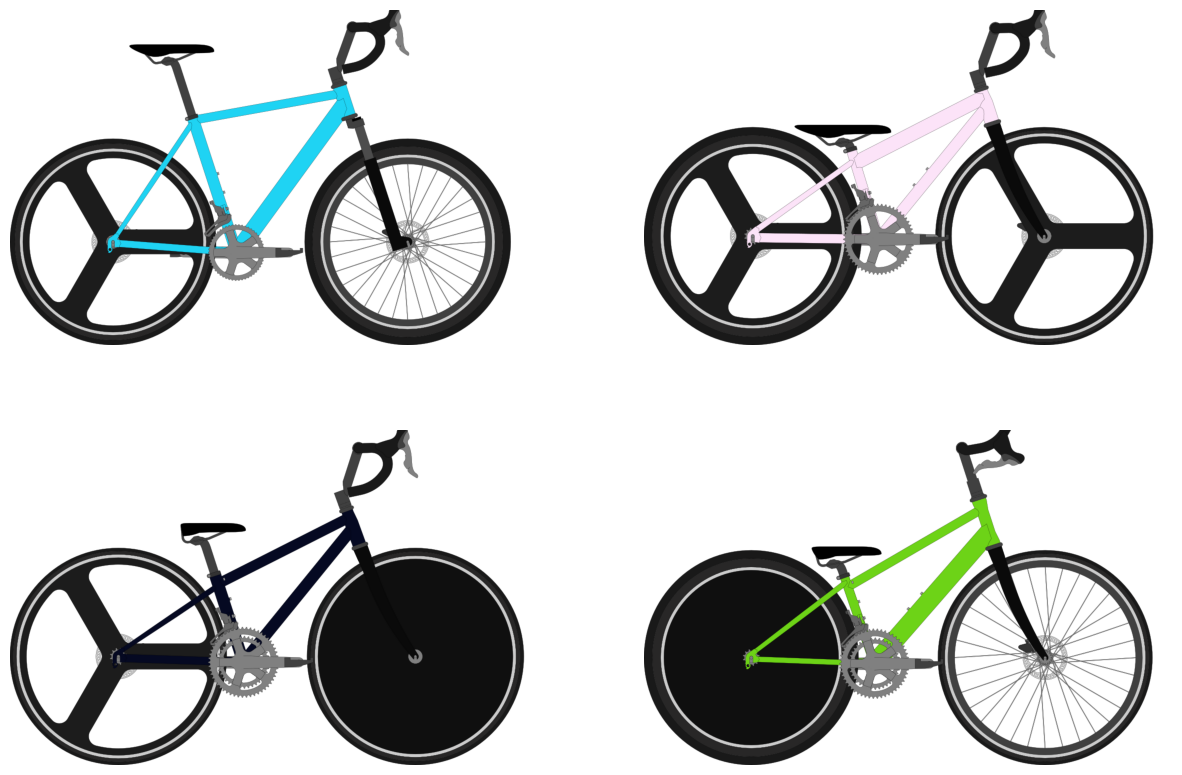

In [42]:
n = 2
import cairosvg
from PIL import Image
from matplotlib import pyplot as plt
import io
import numpy as np
from mcd_clip.resource_utils import run_result_path

fig, axs = plt.subplots(n, n, figsize=(15, 10))

curr_bike = 0
for i in range(n):
    for j in range(n):
        ax = axs[i, j]
        image_open = Image.open(io.BytesIO(cairosvg.svg2png(images[curr_bike].image)))
        ax.imshow(np.asarray(image_open, dtype='int32'))
        ax.axis('off')
        curr_bike += 1
plt.savefig(run_result_path('bikes_array.png'))